# Metric Plots

## Log Loss as a function of cadence property

##### Properties

* Object
* RA, DEC
* delta t lambda (for detected objects)
* Milky extinction
* Redshift
* nObs per pass-band
* Peak-mag per pass-band

##### Import packages

In [1]:
import re
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from copy import deepcopy
from sklearn.metrics import confusion_matrix
import numpy as np

Define plotting fuction <a class="anchor" id="plotfunction"></a>

In [2]:
# dataframe( columns = ['true', 'predicted', 'RA', 'Dec', 'prop'])

#def transientMetricPlots(y_true, y_pred, RA, DEC, prop):
def transientMetricPlots(dataframe,property_name):
    nbins = 150
    prop_list = []
    logloss_list = []
    # Compute binning
        # values in bins
    dataframe['{}'.format(property_name)].dropna(inplace=True)
    hist, bin_edges = np.histogram(dataframe['{}'.format(property_name)],bins=nbins) 

    for i in range(nbins):
        bin_value = (bin_edges[i+1] + bin_edges[i])/2.0
        dataframe.dropna(inplace=True, subset=['{}'.format(property_name)])
        if re.search('nobs',property_name) is not None:
            bin_value=np.ceil(bin_value)
            property_subset = dataframe.query('{0} <= {2}  & {2} < {1}'.format(bin_edges[i],bin_edges[nbins-1],property_name))
        else:
            property_subset = dataframe.query('{0} <= {2}  & {2} < {1}'.format(bin_edges[i],bin_edges[i+1],property_name))
        if property_subset.empty:
            continue
        else:
            y_true = np.vstack(property_subset['true']) #y_true.values
            y_pred = np.vstack(property_subset['predicted'])

            y_preds = np.argmax(y_pred, axis=1)
            y_trues = np.argmax(y_true, axis=1)

            cm = confusion_matrix(y_trues, y_preds)
            #print("Confusion Matrix:\n{}".format(cm))

            logloss = log_loss(y_true, y_pred)
            logloss_list.append(logloss)
            prop_list.append(bin_value)
            #print("Log-Loss:\n{}".format(logloss))
    
    # plot 2D classification metric (log-loss) vs property
    fig2d, axes = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios':[5,2]}, figsize=(16, 8))
    axes[0].scatter(prop_list,logloss_list)
    axes[0].set_title('Classification Log-loss vs. {}'.format(property_name))
    axes[0].set_xlabel('{}'.format(property_name))
    axes[0].set_ylabel('Log-loss')
    
    axes[1].hist(dataframe['{}'.format(property_name)], bins=nbins)
    axes[1].set_yscale('log')
    axes[1].set_xlabel('{}'.format(property_name))
    axes[1].set_ylabel('N({})'.format(property_name))
    #To Do: - FORMAT PLOTS
    return fig2d
  
    # stretch goal: heat map on sky for fun

Load in data and combine files in order to calculate Log Loss score

In [3]:
from sklearn.metrics import log_loss

# inputs: confusion matrix
# inputs: properties, RA, DEC

# pred_path = "pred_DDF.csv"
# true_path = "truth_DDF.csv"
# prop_path = 'obj_table_DDF.txt'

cadence   = "kraken_2026_WFD"
pred_path = "data/kraken_2026_WFD_tables_few_timesteps/pred_60.csv"
true_path = "data/kraken_2026_WFD_tables_few_timesteps/truth_60.csv"
prop_path = 'data/kraken_2026_WFD_tables_few_timesteps/obj_table_60.txt'

plot_dir = "./plots/"+cadence
import os
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
y_true = pd.read_csv(true_path, delimiter='\s+', dtype='f', index_col= False, header=None)
y_pred = pd.read_csv(pred_path, delimiter='\s+', dtype='f', index_col=False, header=None)
obj_table = pd.read_csv(prop_path, sep='\s+',index_col=0)

In [4]:
print(os.path.exists(cadence))
!ls

False
LICENSE    metric_plots_quick_solution-Copy1.ipynb  plots
README.md  metric_plots_quick_solution.ipynb
data	   metrics


In [5]:
true_pred_df = pd.DataFrame(index=obj_table.index,columns=['true','predicted'])

for k, ind in enumerate(list(obj_table.index)):
    true_pred_df.at[ind,'true'] = np.asarray(y_true.iloc[k])
    true_pred_df.at[ind,'predicted'] = np.asarray(y_pred.iloc[k])

In [6]:
dataframe = obj_table.join(true_pred_df)

In [7]:
print(dataframe.columns)

Index(['peakmjd', 'trigger_mjd', 'sim_host_redshift', 'classnum', 'ra', 'dec',
       'mwebv', 'pu', 'pg', 'pr', 'pi', 'pz', 'pY', 'nobs_u', 'nobs_g',
       'nobs_r', 'nobs_i', 'nobs_z', 'nobs_Y', 'deltat_u', 'deltat_g',
       'deltat_r', 'deltat_i', 'deltat_z', 'deltat_Y', 'true', 'predicted'],
      dtype='object')


Create plots for each cadence property listed in the above cell

In [8]:
for property_name in list(dataframe.columns):
    if re.search('true',property_name) is None and re.search('predicted',property_name) is None and re.search('ra',property_name) is None and re.search('dec',property_name) is None and re.search('classnum',property_name) is None: 
        print(property_name)
        figure2d = transientMetricPlots(deepcopy(dataframe),property_name)
        figure2d.savefig('./plots/{}/{}_classification_vs_{}.png'.format(cadence, cadence, property_name), bbox_inches='tight')
        plt.close(figure2d)

peakmjd
trigger_mjd
sim_host_redshift
mwebv
pu
pg
pr
pi
pz
pY
nobs_u
nobs_g
nobs_r
nobs_i
nobs_z
nobs_Y
deltat_u
deltat_g
deltat_r
deltat_i
deltat_z
deltat_Y


_Inspect results_ -- Reformatting of plots can be done [here](#plotfunction)

In [9]:
# from IPython.display import Image
# from IPython.display import display
# x = Image(filename='./plots/kraken_2026_WFD_classification_vs_deltat_g.png') 
# y = Image(filename='./plots/kraken_2026_WFD_classification_vs_deltat_Y.png') 
# display(x, y)

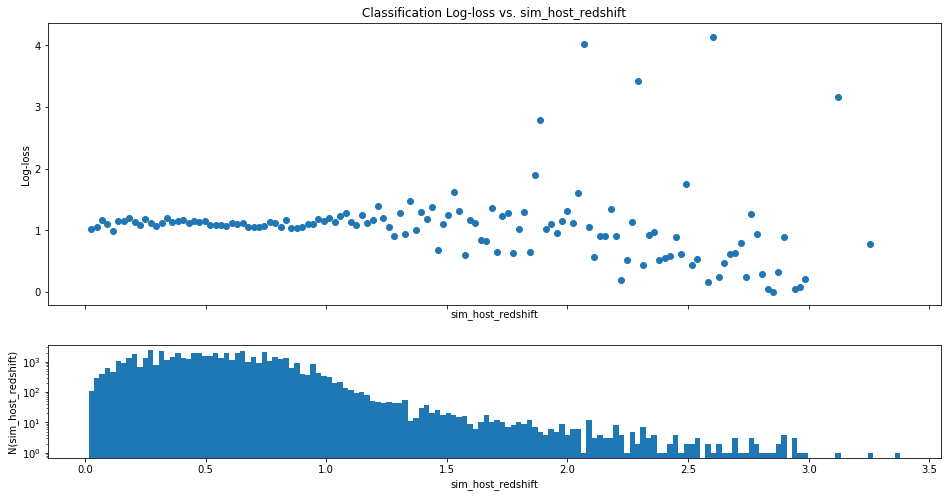

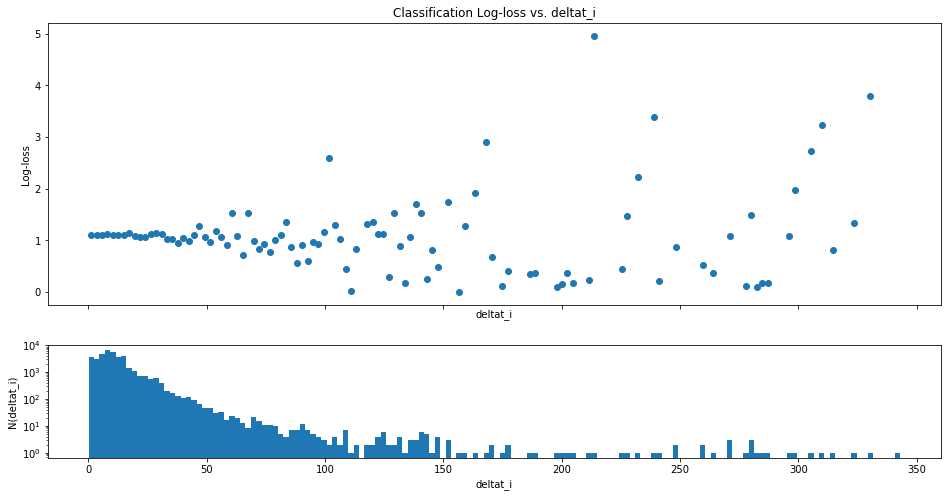

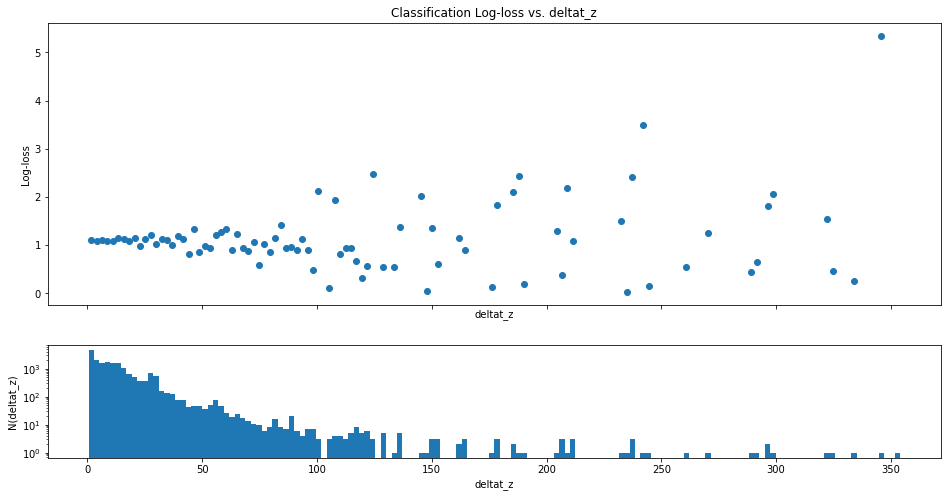

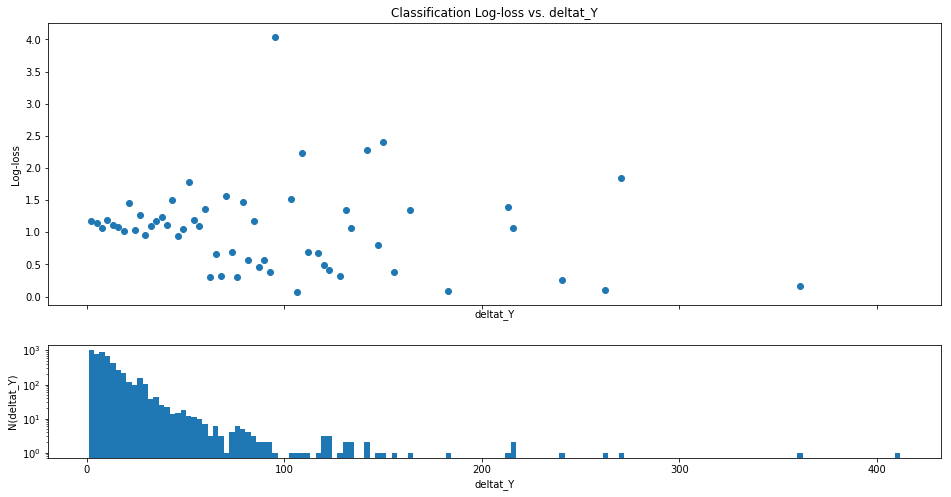

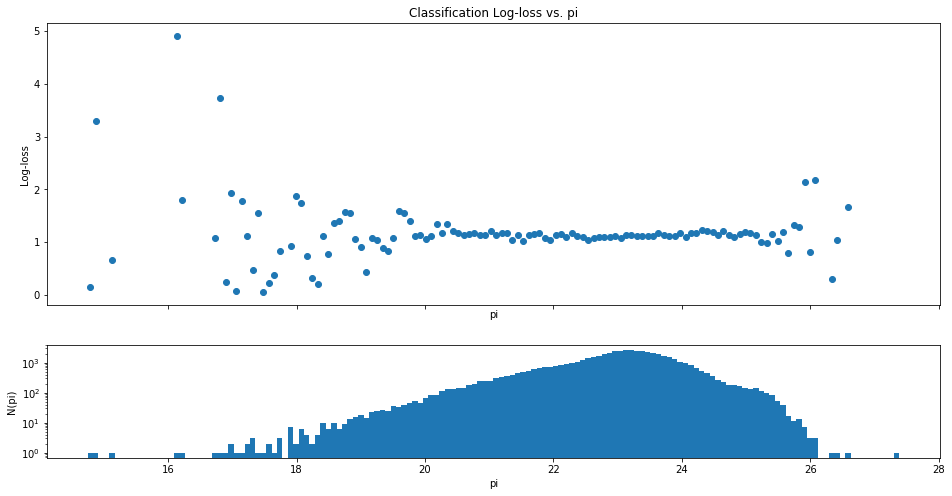

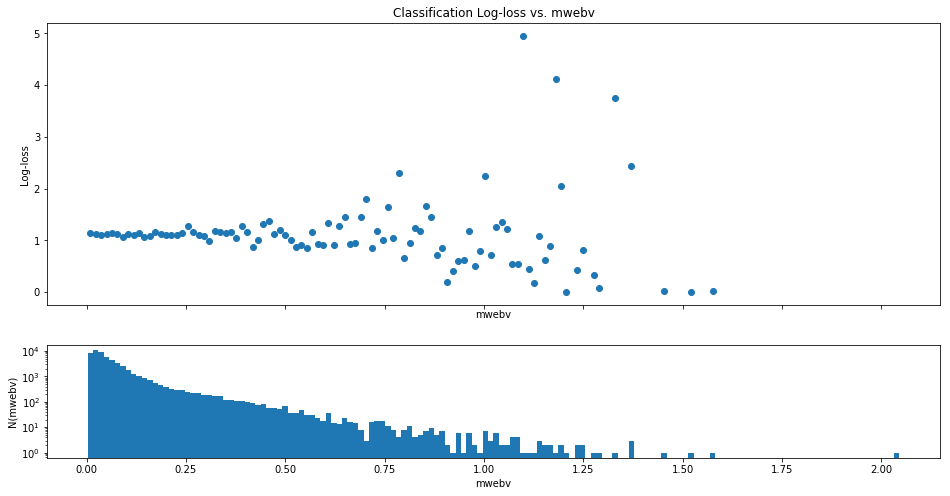

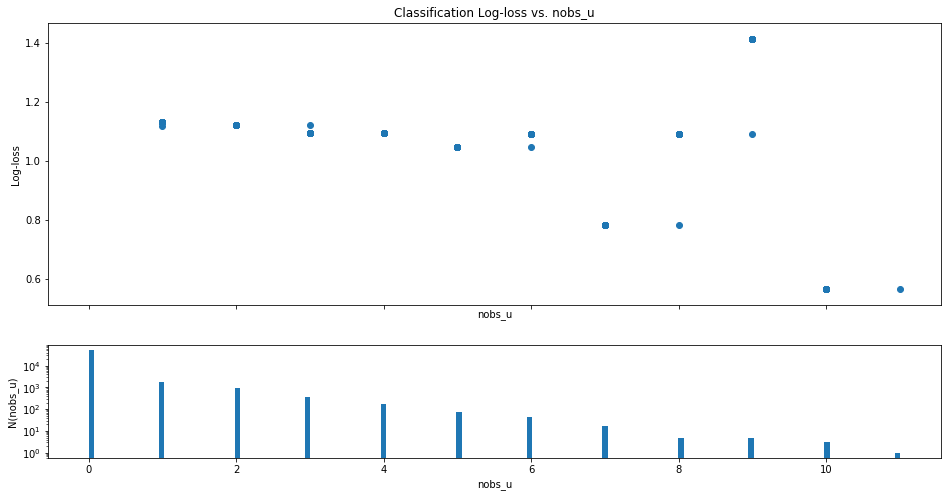

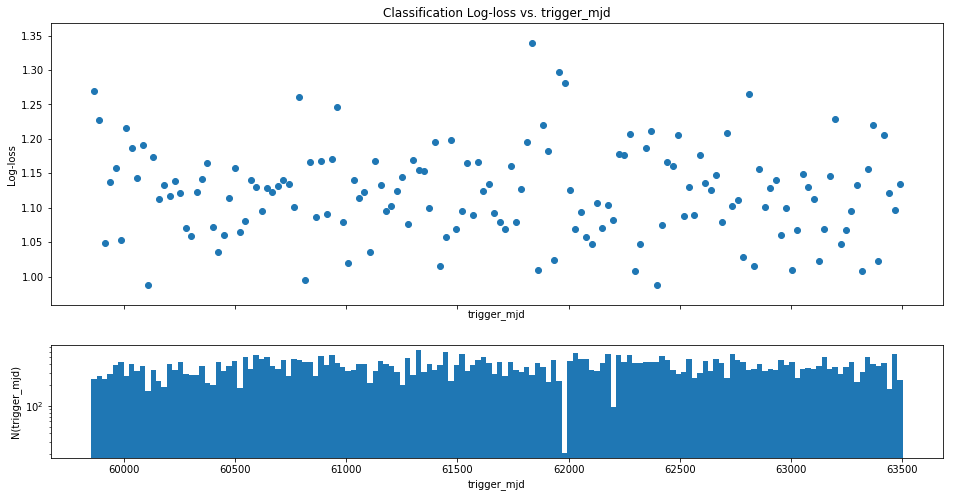

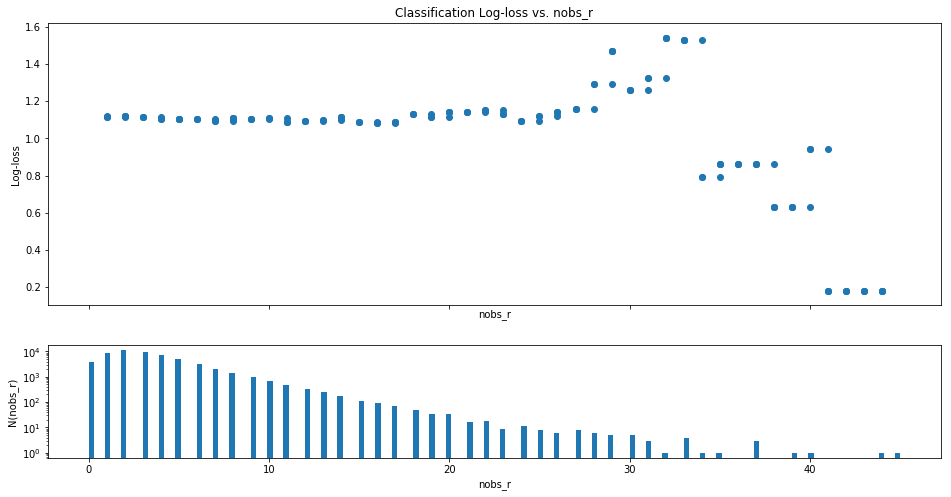

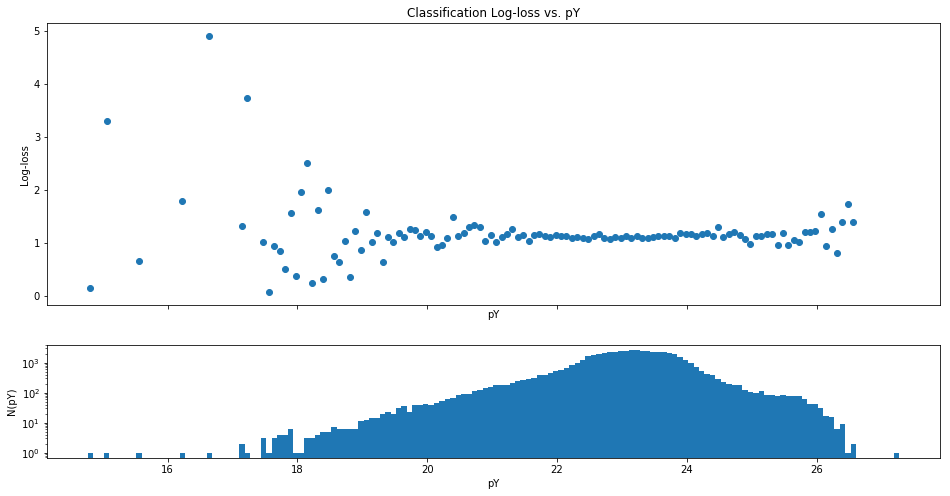

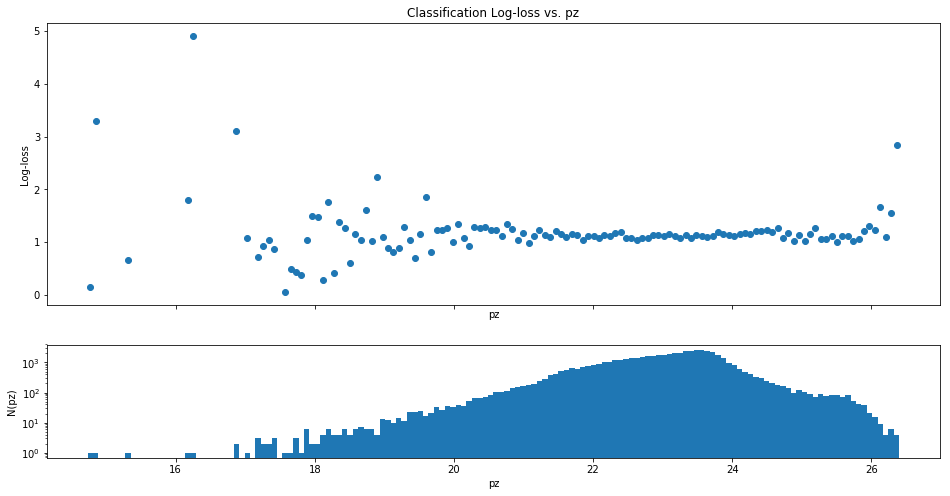

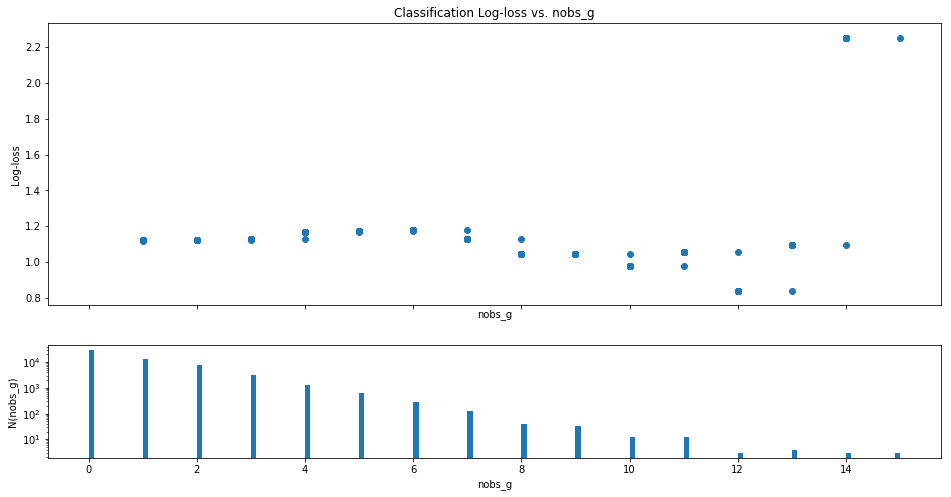

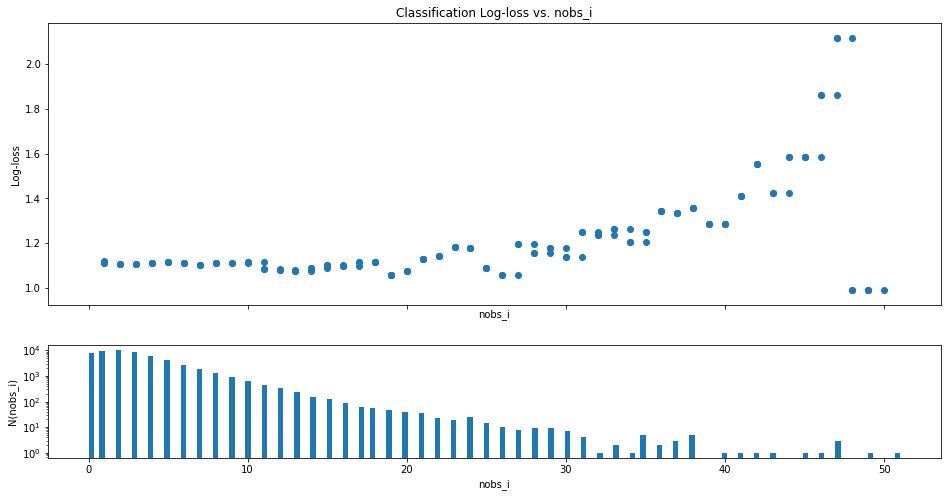

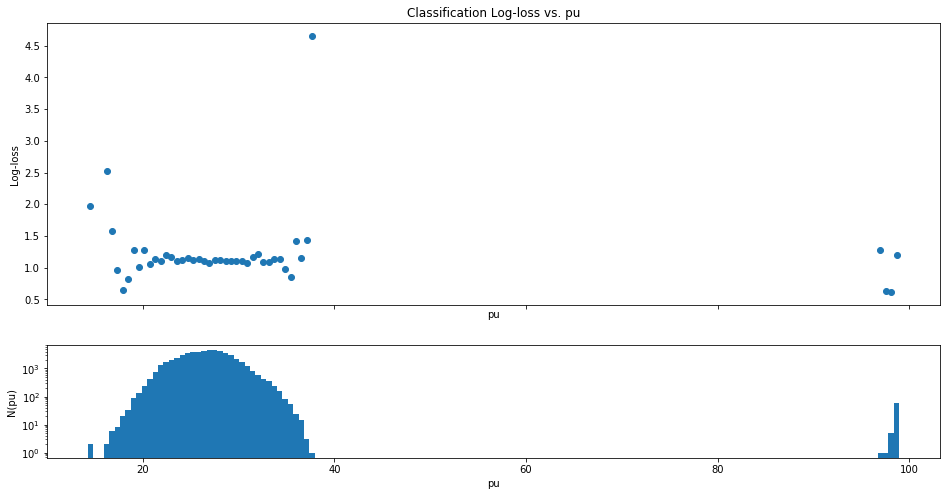

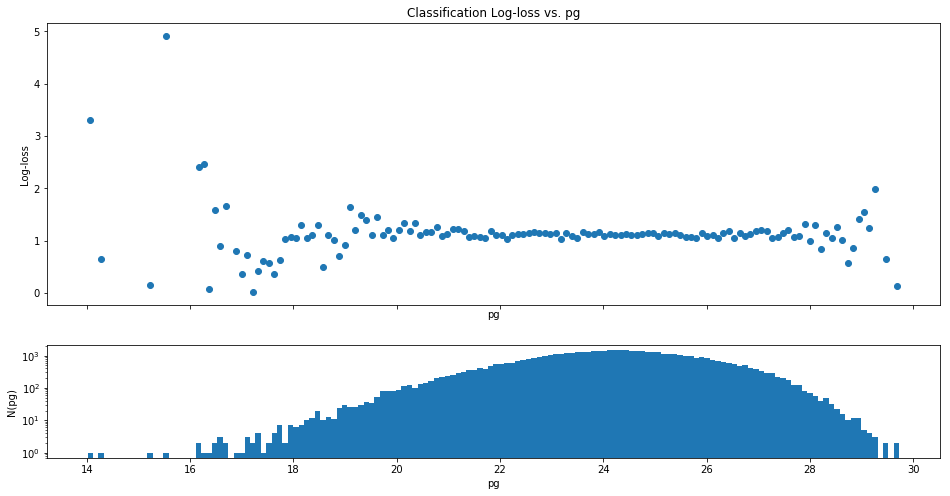

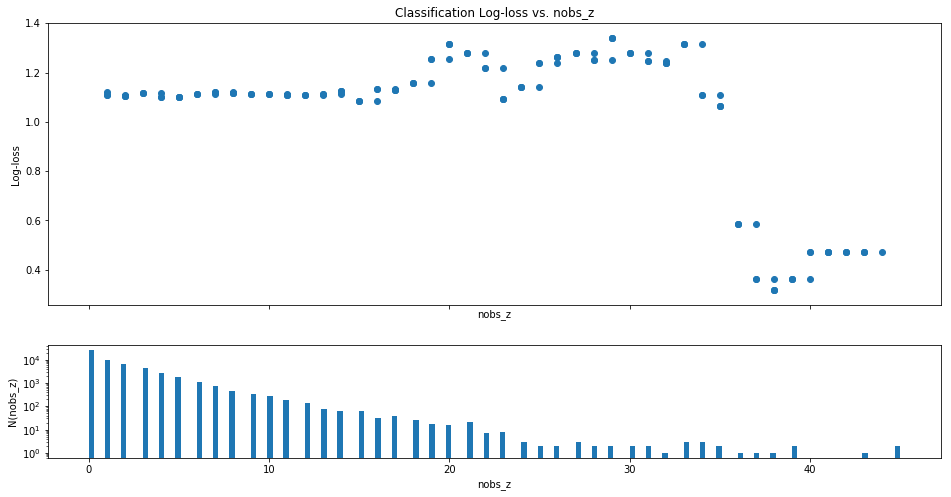

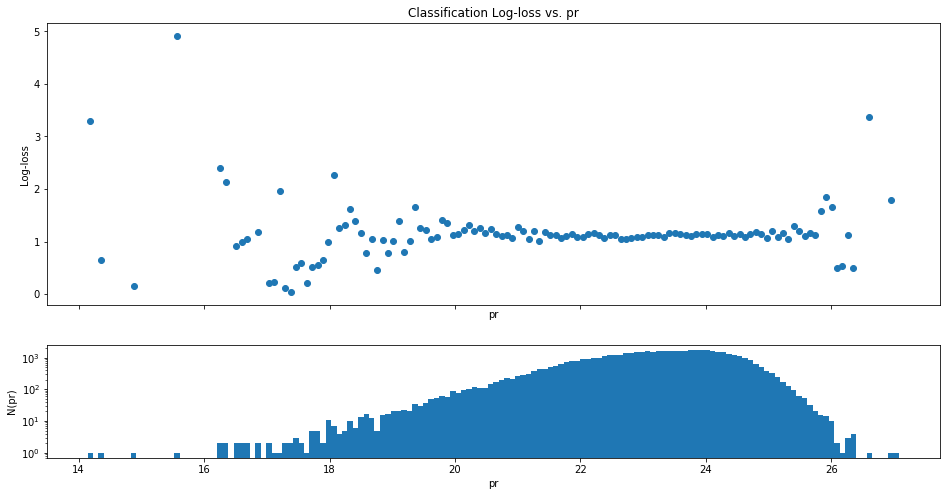

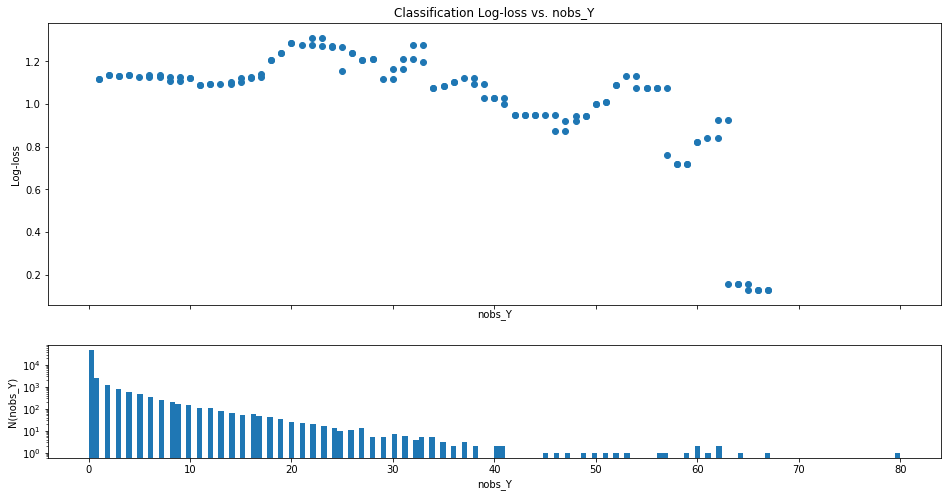

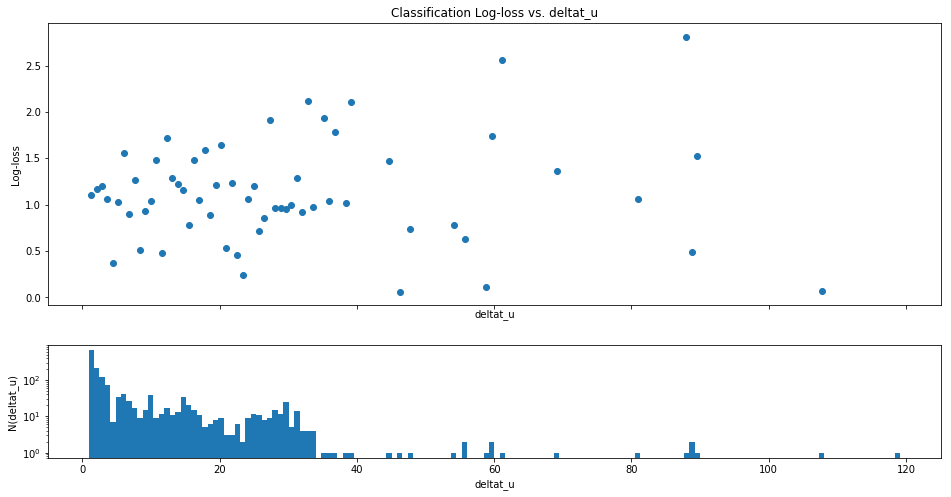

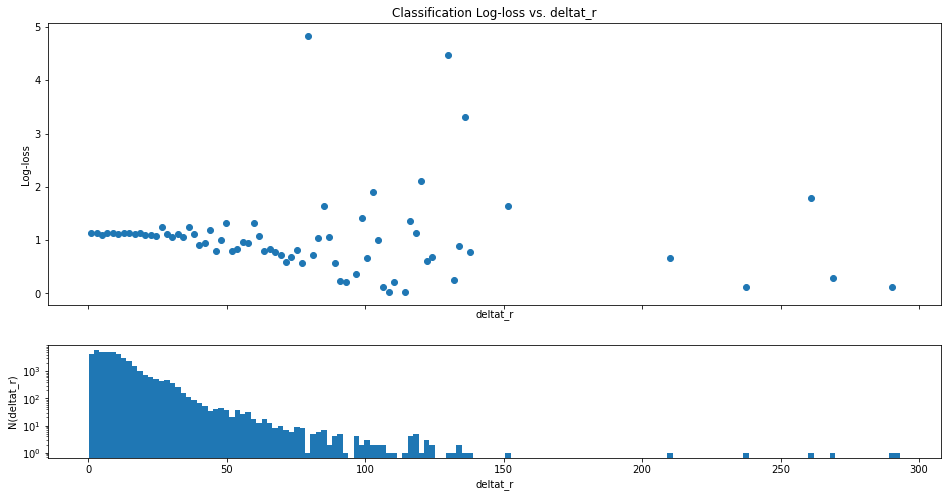

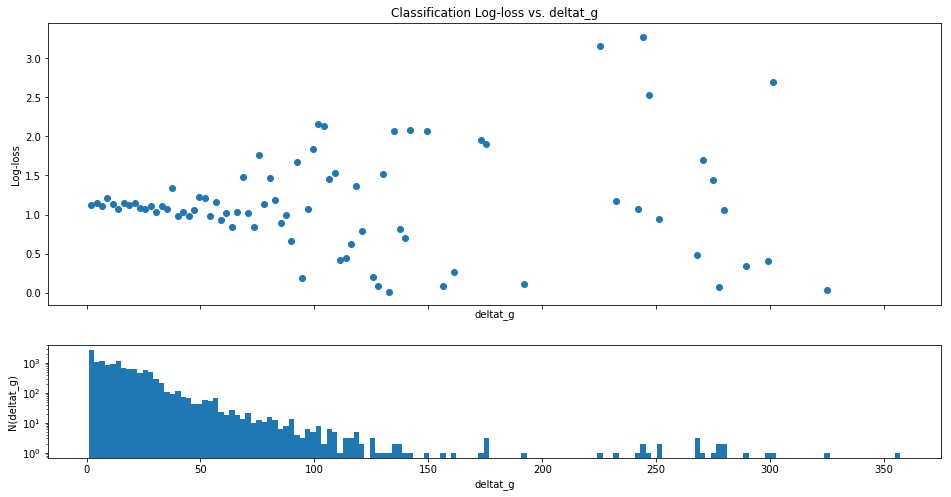

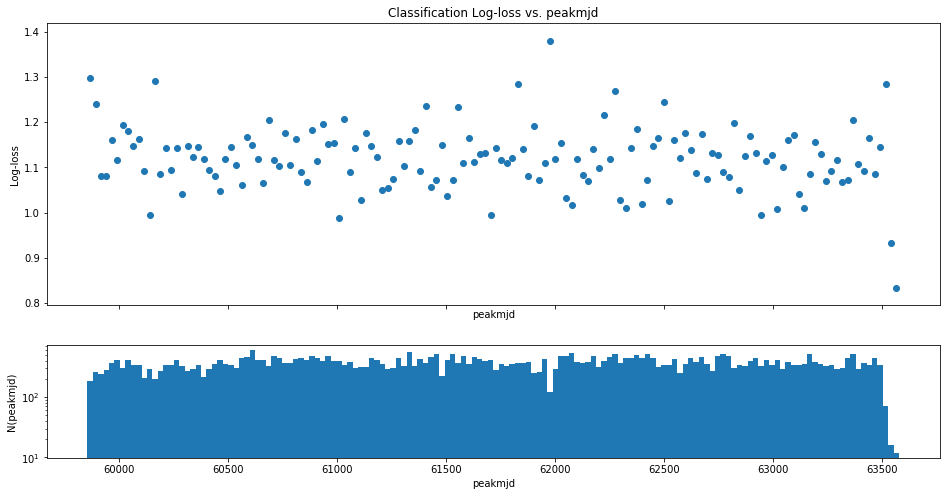

In [12]:
from IPython.display import Image
from IPython.display import display
import glob
files = [f for f in glob.glob('./plots/{}/*.png'.format(cadence))]
images = []
for file in files:
    images.append(Image(filename=file)) 
display(*images)